In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
from os import listdir
from os.path import isfile, join
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Activation, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

path1 = "/content/drive/My Drive/Colab Notebooks/3000tweet/raw_texts/1"
path2 = "/content/drive/My Drive/Colab Notebooks/3000tweet/raw_texts/2"
path3 = "/content/drive/My Drive/Colab Notebooks/3000tweet/raw_texts/3"


files1 = [f for f in listdir(path1) if isfile(join(path1, f))]
files2 = [f for f in listdir(path2) if isfile(join(path2, f))]
files3 = [f for f in listdir(path3) if isfile(join(path3, f))]
totalFileCount = len(files1) + len(files2) + len(files3)

df = pd.DataFrame(columns=['y','x'],index=range(totalFileCount))

Using TensorFlow backend.


In [6]:
for idx, file in enumerate(files1):
    file = open( path1 + "/" + file, "r", encoding="cp1254") 
    sentimentDict = {}
    sentimentDict["y"] = 1
    sentimentDict["x"] =  file.read() 
    df.iloc[idx] = sentimentDict
    
for idx, file in enumerate(files2):
    file = open( path2 + "/" + file, "r", encoding="cp1254") 
    sentimentDict = {}
    sentimentDict["y"] = 2
    sentimentDict["x"] =  file.read() 
    df.iloc[len(files1) + idx] = sentimentDict
    
for idx, file in enumerate(files3):
    file = open( path3 + "/" + file, "r", encoding="cp1254") 
    sentimentDict = {}
    sentimentDict["y"] = 3
    sentimentDict["x"] =  file.read() 
    df.iloc[len(files1) + len(files2) + idx] = sentimentDict

In [7]:
x = df['x']
y = df['y']

tweets=[]
for i in x:
  tweets.append(i)
print(tweets[0])

dun Turkcelle tepkilerimizden sonra bugün Turkcell twittera sponsor olmuş. Ne tesadüf değil mi ? :)


In [8]:
!pip install glove_python
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
words=[]
for i in tweets:
  words.append(word_tokenize(i))

from glove import Corpus, Glove

corpus=Corpus()
corpus.fit(words,window=10)
glove=Glove(no_components=50, learning_rate=0.2)
glove.fit(corpus.matrix, epochs=50, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')



     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700270 sha256=93ae0bcd4ee3601b0f18f25f9d7c7f86347fcf6194b4bc4e7a3d87ce2d0575d4
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Performing 50 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


In [9]:
with open("/content/drive/My Drive/Colab Notebooks/glove_deger_3ktweet.txt","w") as f:
  for word in glove.dictionary:
    f.write(word)
    f.write(" ")
    for i in range(0,20):
      f.write(str(glove.word_vectors[glove.dictionary[word]][i]))
      f.write(" ")
    f.write("\n")

In [11]:
token = Tokenizer()
token.fit_on_texts(x)
x = token.texts_to_sequences(x)
x = pad_sequences(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

encode = preprocessing.LabelEncoder()
y = encode.fit_transform(y)
y = to_categorical(y)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [12]:
from keras.preprocessing.sequence import pad_sequences
pad_seq=pad_sequences(x)
vocab_size=len(token.word_index)+1

In [13]:
from numpy import array,asarray,zeros
from tqdm import tqdm
embedding_vector=dict()
f=open('/content/drive/My Drive/Colab Notebooks/glove_deger_3ktweet.txt',encoding='utf8')
for line in f:
  value=line.split()
  word=value[0]
  coef=asarray(value[1:],dtype='float32')
  embedding_vector[word]=coef
f.close()

In [14]:
embedding_matrix=np.zeros((vocab_size,20))
for word,i in tqdm(token.word_index.items()):
  embedding_value=embedding_vector.get(word)
  if embedding_value is not None:
    embedding_matrix[i]=embedding_value

100%|██████████| 12413/12413 [00:00<00:00, 638405.64it/s]


In [15]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2399 samples, validate on 600 samples
Epoch 1/25
2399/2399 [==============================] - 4s 2ms/step - loss: 0.3840 - accuracy: 0.8338 - val_loss: 0.3010 - val_accuracy: 0.8522
Epoch 2/25
2399/2399 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.8806 - val_loss: 0.2931 - val_accuracy: 0.8783
Epoch 3/25
2399/2399 [==============================] - 4s 2ms/step - loss: 0.2679 - accuracy: 0.8861 - val_loss: 0.2843 - val_accuracy: 0.8789
Epoch 4/25
2399/2399 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.8865 - val_loss: 0.2723 - val_accuracy: 0.8872
Epoch 5/25
2399/2399 [==============================] - 4s 2ms/step - loss: 0.2600 - accuracy: 0.8891 - val_loss: 0.2731 - val_accuracy: 0.8783
Epoch 6/25
2399/2399 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.8900 - val_loss: 0.2653 - val_accuracy: 0.8772
Epoch 7/25
2399/2399 [==============================] - 4s 2ms/step - loss: 0.2560 - accu

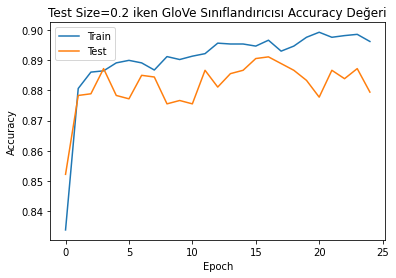

In [18]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

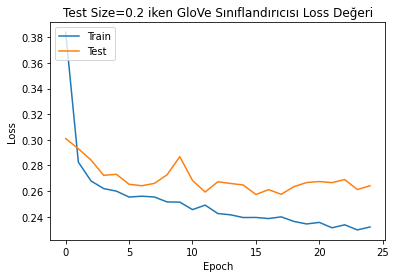

In [19]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [20]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.5, random_state=0)

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1499 samples, validate on 1500 samples
Epoch 1/25
1499/1499 [==============================] - 3s 2ms/step - loss: 0.4435 - accuracy: 0.8076 - val_loss: 0.3266 - val_accuracy: 0.8524
Epoch 2/25
1499/1499 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.8699 - val_loss: 0.2888 - val_accuracy: 0.8524
Epoch 3/25
1499/1499 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8644 - val_loss: 0.2711 - val_accuracy: 0.8862
Epoch 4/25
1499/1499 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.8813 - val_loss: 0.2787 - val_accuracy: 0.8836
Epoch 5/25
1499/1499 [==============================] - 3s 2ms/step - loss: 0.2676 - accuracy: 0.8857 - val_loss: 0.2735 - val_accuracy: 0.8831
Epoch 6/25
1499/1499 [==============================] - 3s 2ms/step - loss: 0.2657 - accuracy: 0.8861 - val_loss: 0.2545 - val_accuracy: 0.8949
Epoch 7/25
1499/1499 [==============================] - 3s 2ms/step - loss: 0.2614 - acc

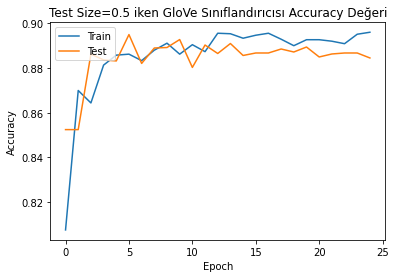

In [22]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

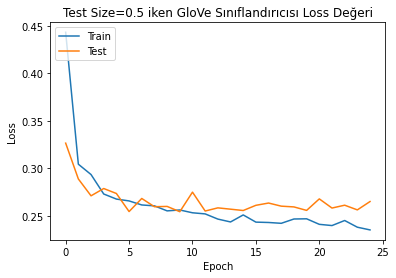

In [23]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [24]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.7, random_state=0)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 899 samples, validate on 2100 samples
Epoch 1/25
899/899 [==============================] - 2s 3ms/step - loss: 0.5085 - accuracy: 0.7512 - val_loss: 0.3730 - val_accuracy: 0.8303
Epoch 2/25
899/899 [==============================] - 2s 2ms/step - loss: 0.3387 - accuracy: 0.8506 - val_loss: 0.3271 - val_accuracy: 0.8387
Epoch 3/25
899/899 [==============================] - 2s 2ms/step - loss: 0.3060 - accuracy: 0.8595 - val_loss: 0.3063 - val_accuracy: 0.8705
Epoch 4/25
899/899 [==============================] - 2s 2ms/step - loss: 0.2843 - accuracy: 0.8773 - val_loss: 0.2839 - val_accuracy: 0.8890
Epoch 5/25
899/899 [==============================] - 2s 2ms/step - loss: 0.2843 - accuracy: 0.8762 - val_loss: 0.2828 - val_accuracy: 0.8514
Epoch 6/25
899/899 [==============================] - 2s 2ms/step - loss: 0.2680 - accuracy: 0.8806 - val_loss: 0.2798 - val_accuracy: 0.8794
Epoch 7/25
899/899 [==============================] - 2s 2ms/step - loss: 0.2690 - accuracy: 0.8858 -

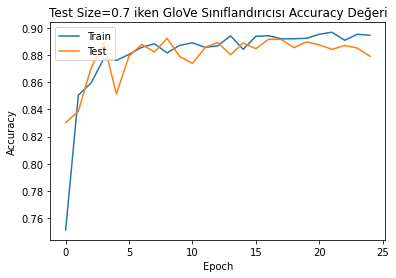

In [26]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

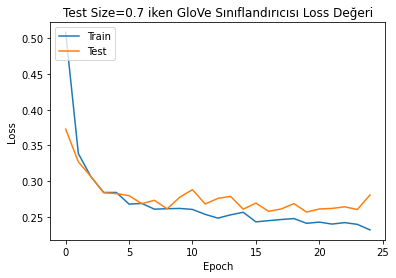

In [27]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()